In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

dados = pd.read_csv('../dadosExtraidos.csv')
dados.shape

(46, 16)

In [108]:
dados.columns[1:14]

Index(['Ano_Ingresso', 'Joga_Algo', 'Joga_LoL', 'Nick', 'CR', 'Nivel',
       'Num_Partidas', 'Horas_Jogadas', 'Campeao_Preferido', 'Maestria', 'Elo',
       'Divisao', 'Vitorias'],
      dtype='object')

In [109]:
tabela = pandas.DataFrame(dados, columns = ['Ano_Ingresso', 'CR', 'Joga_Algo', 'Joga_LoL', 'Nivel', 'Num_Partidas', 
                                            'Horas_Jogadas', 'Campeao_Preferido', 'Maestria', 'Elo', 'Divisao', 
                                            'Vitorias', 'Derrotas', 'Porcentagem_Vitorias'])
#tabela.head(20)
tabela

,Ano_Ingresso,CR,Joga_Algo,Joga_LoL,Nivel,Num_Partidas,Horas_Jogadas,Campeao_Preferido,Maestria,Elo,Divisao,Vitorias,Derrotas,Porcentagem_Vitorias
0,2015,60.60,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,53.00,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,43.80,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,42.00,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,68.40,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2016,72.30,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2013,50.00,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,70.20,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2013,43.10,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2016,45.80,True,True,87.0,3750.0,2187.0,Yasuo,124061.0,GOLD,I,11.0,22.0,33.33


In [110]:
#retira os nulos (não tem CR)
tabela=tabela.loc[(tabela['CR'].notnull())]
#media dos CRs geral
print(tabela['CR'].mean())

60.81666666666668


In [111]:
#pessoas que jogam LoL
jogaLol = tabela[tabela['Joga_LoL']==True]
#media dos CRs de quem joga LoL
print("\nCR - JOGADORES DE LOL ", jogaLol['CR'].mean())


CR - JOGADORES DE LOL  62.2


In [112]:
#pessoas que NÃO jogam LoL
naoJogaLol = tabela[tabela['Joga_LoL']==False]
#media dos CRs de quem NÃO joga LoL
print("\nCR - NÃO JOGADORES DE LOL ", naoJogaLol['CR'].mean())


CR - NÃO JOGADORES DE LOL  60.12499999999999


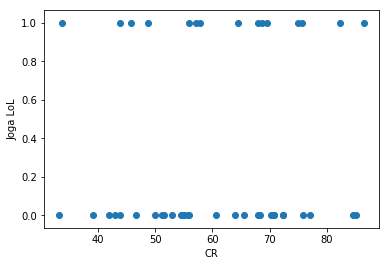

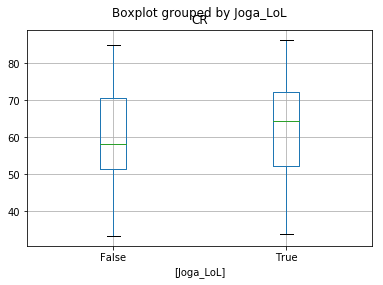

In [113]:
import matplotlib.pyplot as plt
#Alunos que não jogam LoL x Alunos que jogam LoL
plt.scatter( tabela.CR, tabela.Joga_LoL)
plt.ylabel('Joga LoL')
plt.xlabel('CR')
plt.show()

categad = pandas.DataFrame(tabela, columns=['CR', 'Joga_LoL'])
categad.boxplot(by='Joga_LoL')

(0.973222017288208, 0.6305406093597412)
(0.9783853888511658, 0.9572828412055969)


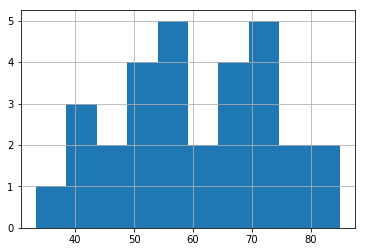

In [114]:
#teste das suposições

print(stats.shapiro(categad.CR.loc[categad.Joga_LoL == False]))
print(stats.shapiro(categad.CR.loc[categad.Joga_LoL == True]))

#a saída do teste é o valor W e o p-value
#considera-se que a suposição não é violada quando o p-value é maior que alpha, normalmente 0.05

#pelo histograma, também é possível observar a distribuição dos dados. 
categad.CR.loc[categad.Joga_LoL == False].hist()

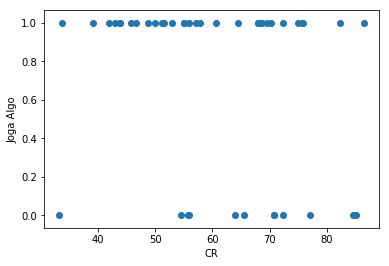

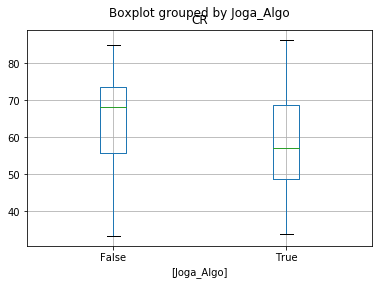

In [115]:

# Alunos que não jogam x Alunos que jogam algum tipo de jogo
plt.scatter( tabela.CR, tabela.Joga_Algo)
plt.ylabel('Joga Algo')
plt.xlabel('CR')
plt.show()

categad = pandas.DataFrame(tabela, columns=['CR', 'Joga_Algo'])
categad.boxplot(by='Joga_Algo')

(0.9371952414512634, 0.4626140594482422)
(0.9712708592414856, 0.5160974264144897)


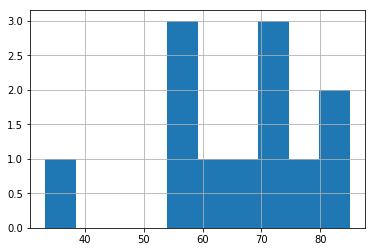

In [118]:
print(stats.shapiro(categad.CR.loc[categad.Joga_Algo == False]))
print(stats.shapiro(categad.CR.loc[categad.Joga_Algo == True]))

#a saída do teste é o valor W e o p-value
#considera-se que a suposição não é violada quando o p-value é maior que alpha, normalmente 0.05

#pelo histograma, também é possível observar a distribuição dos dados. 
categad.CR.loc[categad.Joga_Algo == False].hist()

In [102]:
#pessoas que jogam
jogaAlgo = tabela[tabela['Joga_Algo']==True]
#media dos CRs de quem joga 
print("\nCR - JOGADORES", jogaAlgo['CR'].mean())

#pessoas que NÃO jogam
naoJoga = tabela[tabela['Joga_Algo']==False]
#media dos CRs de quem NÃO joga 
print("\nCR - NÃO JOGADORES", naoJoga['CR'].mean())



CR - JOGADORES 59.00151515151515

CR - NÃO JOGADORES 65.80833333333334


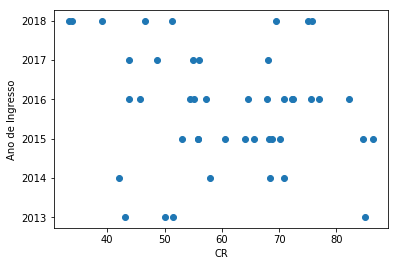

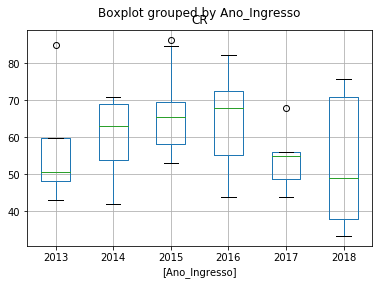

In [103]:
# Ano de Ingresso x CR
plt.scatter( tabela.CR, tabela.Ano_Ingresso)
plt.ylabel('Ano de Ingresso')
plt.xlabel('CR')
plt.show()

categad = pandas.DataFrame(tabela, columns=['CR', 'Ano_Ingresso'])
categad.boxplot(by='Ano_Ingresso')

c:\users\camila\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


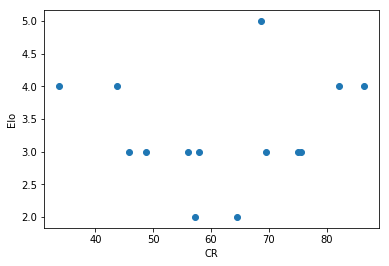

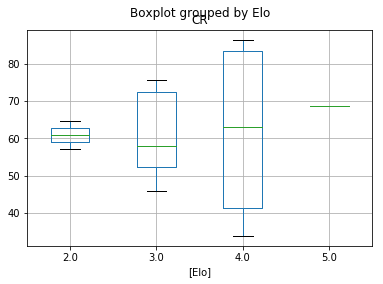

In [104]:
# É necessário mapear os Elos
jogaLol['Elo'] = jogaLol['Elo'].map({'BRONZE': 1, 'SILVER': 2, 'GOLD': 3, 'PLATINUM': 4,'DIAMOND': 5})

# Elo x CR
plt.scatter( jogaLol.CR, jogaLol.Elo)
plt.ylabel('Elo')
plt.xlabel('CR')
plt.show()

categad = pandas.DataFrame(jogaLol, columns=['CR', 'Elo'])
categad.boxplot(by = 'Elo')

In [105]:
# Horas Jogadas x CR
'''plt.scatter( jogaLol.CR, jogaLol.Horas_Jogadas)
plt.ylabel('Horas Jogadas')
plt.xlabel('CR')
plt.show()

categad = pandas.DataFrame(jogaLol, columns=['CR', 'Horas_Jogadas'])
categad.boxplot(by='Horas_Jogadas') '''

"plt.scatter( jogaLol.CR, jogaLol.Horas_Jogadas)\nplt.ylabel('Horas Jogadas')\nplt.xlabel('CR')\nplt.show()\n\ncategad = pandas.DataFrame(jogaLol, columns=['CR', 'Horas_Jogadas'])\ncategad.boxplot(by='Horas_Jogadas') "